In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

plt.style.use('seaborn-colorblind')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
enem_train = pd.read_csv("train.csv")
enem_train.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
enem_test = pd.read_csv("test.csv")
enem_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [5]:
#Ok, nem tentar brincar com coluna que não está no treino
#E ja vou tirar os códigos das provas
enem_train = enem_train[['NU_INSCRICAO', 'NU_NOTA_MT','CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

## Conhecendo `NU_NOTA_MT`

In [6]:
enem_train.query('NU_NOTA_MT == 0').shape[1]

44

In [7]:
teste = enem_train.query('NU_NOTA_MT != 0')
teste['NU_NOTA_MT'].describe()

count    10123.000000
mean       482.974563
std         98.716334
min        320.500000
25%        409.000000
50%        461.200000
75%        537.700000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

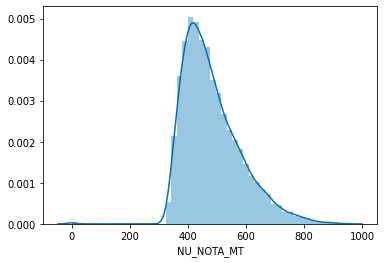

In [8]:
sns.distplot(enem_train['NU_NOTA_MT']);

In [9]:
print("Skewness: %f" % enem_train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % enem_train['NU_NOTA_MT'].kurt())

Skewness: 0.920690
Kurtosis: 1.422503


## Trabalhar com os floats
* NU_NOTA_COMP1
* NU_NOTA_COMP2
* NU_NOTA_COMP3
* NU_NOTA_COMP4
* NU_NOTA_COMP5
* NU_NOTA_REDACAO
* NU_NOTA_CN
* NU_NOTA_CH
* NU_NOTA_LC
* NU_NOTA_MT
* NU_IDADE

In [10]:
floats = enem_train[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                     'NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_IDADE']]

pd.DataFrame({'tipos':floats.dtypes, 
              'missing':floats.isna().sum()/floats.shape[0]*100})

,tipos,missing
NU_NOTA_COMP1,float64,26.198106
NU_NOTA_COMP2,float64,26.198106
NU_NOTA_COMP3,float64,26.198106
NU_NOTA_COMP4,float64,26.198106
NU_NOTA_COMP5,float64,26.198106
NU_NOTA_REDACAO,float64,26.198106
NU_NOTA_MT,float64,26.198106
NU_NOTA_CN,float64,24.683176
NU_NOTA_CH,float64,24.683176
NU_NOTA_LC,float64,26.198106


In [11]:
#para entender esses missing:
aux = enem_train[['TP_PRESENCA_CN','NU_NOTA_MT','NU_NOTA_CN']]
aux.query('TP_PRESENCA_CN == 0').head()

,TP_PRESENCA_CN,NU_NOTA_MT,NU_NOTA_CN
2,0,NaN,NaN
3,0,NaN,NaN
4,0,NaN,NaN
9,0,NaN,NaN
13,0,NaN,NaN


In [12]:
#para entender esses missing:
aux = enem_train[['TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
aux.query('TP_PRESENCA_CH == 0').head()

,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
2,0,0,NaN,NaN,NaN
3,0,0,NaN,NaN,NaN
4,0,0,NaN,NaN,NaN
9,0,0,NaN,NaN,NaN
13,0,0,NaN,NaN,NaN


In [13]:
enem_train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
            'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].describe()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,10133.000000,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,482.497928,473.495155,529.661087,516.472841,529.048258,119.811704,111.915918,106.824238,113.123951,77.372446
std,99.826323,71.093674,73.726344,68.688190,154.294758,29.846017,33.737588,34.341349,33.480033,43.067140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.900000,419.900000,480.400000,468.100000,440.000000,120.000000,100.000000,80.000000,100.000000,40.000000
50%,461.200000,459.800000,532.000000,520.900000,540.000000,120.000000,120.000000,120.000000,120.000000,80.000000
75%,537.600000,514.500000,581.200000,564.900000,600.000000,140.000000,120.000000,120.000000,120.000000,100.000000
max,952.000000,806.400000,807.000000,763.600000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000


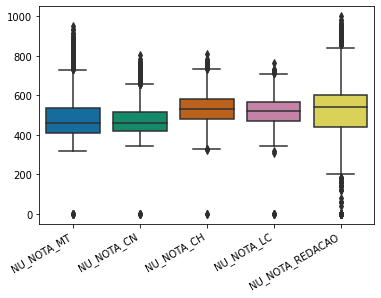

In [14]:
sns.boxplot(data=enem_train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']])
plt.xticks(rotation=30, ha='right');

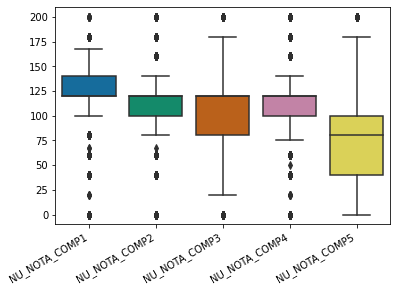

In [15]:
sns.boxplot(data=enem_train[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']])
plt.xticks(rotation=30, ha='right');

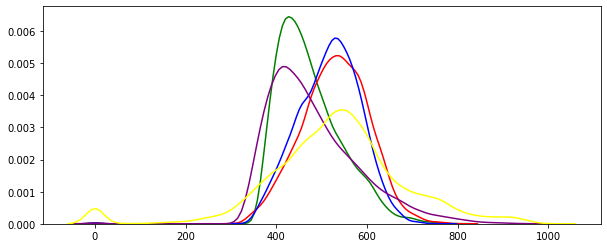

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(enem_train['NU_NOTA_CN'].dropna(), hist=False, color='green')
sns.distplot(enem_train['NU_NOTA_CH'].dropna(), hist=False, color='red')
sns.distplot(enem_train['NU_NOTA_LC'].dropna(), hist=False, color='blue')
sns.distplot(enem_train['NU_NOTA_MT'].dropna(), hist=False, color='purple')
sns.distplot(enem_train['NU_NOTA_REDACAO'].dropna(), hist=False, color='yellow')
plt.xlabel("")
plt.show()

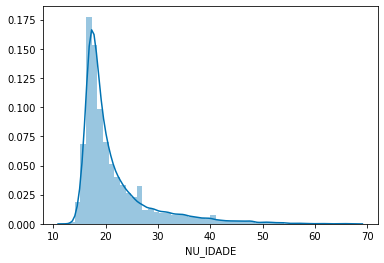

In [17]:
sns.distplot(enem_train['NU_IDADE'])

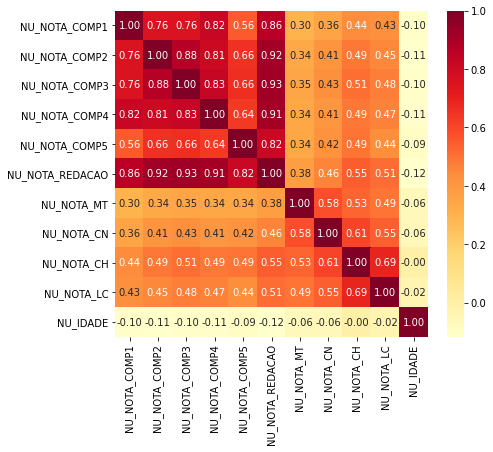

In [18]:
plt.figure(figsize=(7,6))
sns.heatmap(floats.corr(method='pearson'), cmap='YlOrRd', annot=True, fmt='.2f');

In [19]:
#correlação das features com 'NU_NOTA_MT'
correlacao=floats.corr()
print(correlacao['NU_NOTA_MT'])

NU_NOTA_COMP1      0.299402
NU_NOTA_COMP2      0.335638
NU_NOTA_COMP3      0.350307
NU_NOTA_COMP4      0.342282
NU_NOTA_COMP5      0.343337
NU_NOTA_REDACAO    0.379376
NU_NOTA_MT         1.000000
NU_NOTA_CN         0.584941
NU_NOTA_CH         0.529594
NU_NOTA_LC         0.494695
NU_IDADE          -0.061485
Name: NU_NOTA_MT, dtype: float64


In [20]:
enem_train_copy = enem_train.copy()

# 1. Baseline

Random Forest usando apenas **Notas**

### Variáveis

In [21]:
bl = enem_train_copy[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
bl.fillna(-1, inplace=True)

y = bl['NU_NOTA_MT']
X = bl.drop('NU_NOTA_MT', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_test = enem_test[X.columns]

X_test.fillna(-1, inplace=True)

### Modelo

In [23]:
random_forest = RandomForestRegressor(criterion='mse', max_depth=8, n_jobs=-1, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_val)

mae_bl = metrics.mean_absolute_error(y_val, y_pred)
rmse_bl = np.sqrt(metrics.mean_squared_error(y_val, y_pred))

print(mae_bl,rmse_bl)

42.695653938110304 63.372019217177694


In [24]:
y_pred = random_forest.predict(X_test)

In [25]:
answer = pd.DataFrame({'NU_INSCRICAO':enem_test.NU_INSCRICAO,
                        'TP_PRESENCA_CN':enem_test.TP_PRESENCA_CN,
                        'NU_NOTA_MT':y_pred})
answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,430.986341
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,446.782447
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,594.424693
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-1.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,536.476658


In [26]:
for index, row in answer.iterrows():
    if row['TP_PRESENCA_CN'] == 0:
        answer.loc[index,'NU_NOTA_MT'] = np.nan

answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,430.986341
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,446.782447
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,594.424693
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,536.476658


In [27]:
answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.304162
std        98.668501
min        -1.000000
25%       436.291813
50%       457.504337
75%       500.693703
max       862.438157
Name: NU_NOTA_MT, dtype: float64

In [28]:
answer.drop('TP_PRESENCA_CN', axis=1, inplace=True)
answer.to_csv('answer.csv', index=False)

In [29]:
codenation_bl = 93.6457

## Trabalhar com categóricas

In [30]:
enem_train.columns

Index(['NU_INSCRICAO', 'NU_NOTA_MT', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'],
      dtype='object')

In [31]:
categoricas_dig = enem_train[['NU_NOTA_MT','TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 
                              'Q027', 'Q047']]

In [32]:
categoricas_dig.isna().sum().sort_values(ascending=False).head(3)

Q027          7373
NU_NOTA_MT    3597
Q047             0
dtype: int64

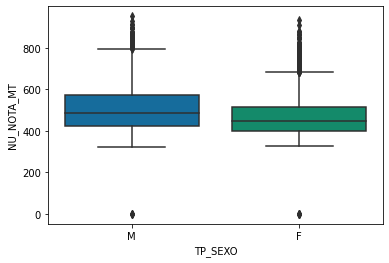

In [33]:
sns.boxplot(categoricas_dig.TP_SEXO, categoricas_dig.NU_NOTA_MT)

**OBS:** Todos os 'TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047' influenciam a nota de matemática pelos boxplot!!!

**OBS2**: Q027 muitos nulos

In [34]:
categoricas_num = enem_train[['NU_NOTA_MT', 'CO_UF_RESIDENCIA',
       'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO','TP_LINGUA', 'TP_STATUS_REDACAO']]

In [35]:
categoricas_num.TP_ANO_CONCLUIU.value_counts()

0     7206
1     1578
10    1167
2     1033
3      712
4      563
6      383
5      379
7      294
8      221
9      194
Name: TP_ANO_CONCLUIU, dtype: int64

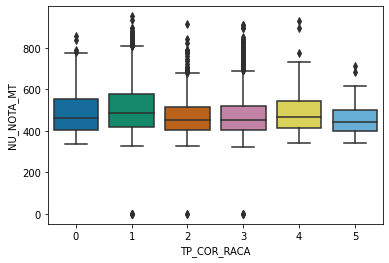

In [36]:
sns.boxplot(categoricas_num.TP_COR_RACA, categoricas_num.NU_NOTA_MT);

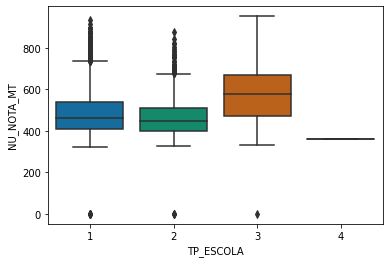

In [37]:
sns.boxplot(categoricas_num.TP_ESCOLA, categoricas_num.NU_NOTA_MT);

In [38]:
(categoricas_num.isna().sum()/categoricas_num.shape[0]*100).sort_values(ascending=False).head(6)

TP_DEPENDENCIA_ADM_ESC    68.812819
TP_ENSINO                 68.812819
TP_STATUS_REDACAO         26.198106
NU_NOTA_MT                26.198106
IN_SABATISTA               0.000000
CO_UF_RESIDENCIA           0.000000
dtype: float64

**OBS**: 'TP_NACIONALIDADE', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_STATUS_REDACAO' tem poucos valores contrastantes (5, 15...) não serve pra modelo.

**OBS2**: TP_ST_CONCLUSAO, TP_ANO_CONCLUIU, TP_ENSINO, IN_TREINEIRO aparentemente não influenciam na nota de matemática

**OBS3**: 'TP_ENSINO','TP_DEPENDENCIA_ADM_ESC' muitos NAN e não saberia lidar com eles

In [39]:
df_train = enem_train[['NU_NOTA_MT', 'NU_IDADE', 'TP_COR_RACA','TP_ESCOLA','TP_LINGUA',
                       'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
                       'TP_SEXO','Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']]

df_train.head()

,NU_NOTA_MT,NU_IDADE,TP_COR_RACA,TP_ESCOLA,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,399.4,24,1,1,1,436.3,495.4,581.2,520.0,M,D,D,C,A,A,C,A
1,459.8,17,3,2,1,474.5,544.1,599.0,580.0,F,A,A,B,A,A,A,A
2,NaN,21,3,1,1,NaN,NaN,NaN,NaN,F,D,D,C,A,A,A,A
3,NaN,25,0,1,0,NaN,NaN,NaN,NaN,F,H,E,E,C,B,C,D
4,NaN,28,2,1,1,NaN,NaN,NaN,NaN,M,E,D,C,A,A,B,A


0	Não declarado
1	Branca
2	Preta
3	Parda
4	Amarela
5	Indígena 
6	Não dispõe da informação


1	Não Respondeu
2	Pública
3	Privada
4	Exterior


In [40]:
df_train['TP_SEXO'] = df_train['TP_SEXO'].map({'F':0, 'M':1}) 

df_train['TP_COR_RACA'] = df_train['TP_COR_RACA'].map({0:'Outros', 6:'Outros', 1:'Branca', 2:'Outros', 
                                                       3:'Outros', 4:'Branca', 5:'Outros'})

df_train['TP_ESCOLA'] = df_train['TP_ESCOLA'].map({1:'Outras', 2:'Outras', 3:'Privada', 4:'Outras'}) 

In [41]:
df_train = pd.get_dummies(df_train)

In [42]:
(df_train.isna().sum()/df_train.shape[0]*100).sort_values(ascending=False).head(6)

NU_NOTA_MT         26.198106
NU_NOTA_LC         26.198106
NU_NOTA_REDACAO    26.198106
NU_NOTA_CN         24.683176
NU_NOTA_CH         24.683176
Q002_C              0.000000
dtype: float64

In [43]:
df_train.fillna(-1, inplace=True)

In [44]:
df_train.head()

,NU_NOTA_MT,NU_IDADE,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA_Branca,TP_COR_RACA_Outros,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,399.4,24,1,436.3,495.4,581.2,520.0,1,1,0,...,1,0,0,0,1,1,0,0,0,0
1,459.8,17,1,474.5,544.1,599.0,580.0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,-1.0,21,1,-1.0,-1.0,-1.0,-1.0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
3,-1.0,25,0,-1.0,-1.0,-1.0,-1.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,-1.0,28,1,-1.0,-1.0,-1.0,-1.0,1,0,1,...,1,0,0,1,0,1,0,0,0,0


In [45]:
print('tenho',df_train.shape[1],'features')

tenho 60 features


## 2. RandomForest

### Variáveis

In [46]:
y = df_train['NU_NOTA_MT']
X = df_train.drop('NU_NOTA_MT', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
X_test = enem_test[['NU_IDADE', 'TP_COR_RACA','TP_ESCOLA','TP_LINGUA',
                    'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
                    'TP_SEXO','Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']]

X_test['TP_SEXO'] = X_test['TP_SEXO'].map({'F':0, 'M':1}) 

X_test['TP_COR_RACA'] = X_test['TP_COR_RACA'].map({0:'Outros', 6:'Outros', 1:'Branca', 2:'Outros', 
                                                       3:'Outros', 4:'Branca', 5:'Outros'})

X_test['TP_ESCOLA'] = X_test['TP_ESCOLA'].map({1:'Outras', 2:'Outras', 3:'Privada', 4:'Outras'})

X_test = pd.get_dummies(X_test)

X_test.fillna(-1, inplace=True)

### Tunar hiperparâmetros

RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

n_estimators: indica o número de árvores construídas pelo algoritmo antes de tomar uma votação ou fazer uma média de predições.

max_features: indica o número máximo de características a serem utilizadas pelo Floresta Aleatória na construção de uma dada árvore

min_sample_leaf: número mínimo de folhas que devem existir em uma dada árvore.

n_jobs: informa quantos processadores o algoritmo pode utilizar. Se ele tiver valor 1, pode utilizar apenas um processador. O valor -1 significa que não há limite na quantidade de processadores a ser utilizada.

In [48]:
from skopt import dummy_minimize

In [49]:
def treinar_modelo(params):
    n_estimators = params[0]
    max_depth = params[1]
    
    random_forest = RandomForestRegressor(n_estimators=n_estimators,
                                          max_depth=max_depth, criterion='mse', 
                                          n_jobs=-1, random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_val)
    return metrics.mean_squared_error(y_val, y_pred)

In [50]:
space = [(80,120),
         (5,15)]

resultado = dummy_minimize(treinar_modelo, space, random_state=42)

In [51]:
resultado.x

[82, 9]

### Modelo

In [52]:
random_forest = RandomForestRegressor(criterion='mse', n_estimators=82, max_depth=9, n_jobs=-1, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_val)

mae_rf = metrics.mean_absolute_error(y_val, y_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_val, y_pred))

print(mae_rf,rmse_rf)

41.71404848401149 61.98138685960719


In [53]:
y_pred = random_forest.predict(X_test)

In [54]:
answer = pd.DataFrame({'NU_INSCRICAO':enem_test.NU_INSCRICAO,
                        'TP_PRESENCA_CN':enem_test.TP_PRESENCA_CN,
                        'NU_NOTA_MT':y_pred})
answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,423.223158
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,441.946058
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,577.504509
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-1.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,556.667022


In [55]:
for index, row in answer.iterrows():
    if row['TP_PRESENCA_CN'] == 0:
        answer.loc[index,'NU_NOTA_MT'] = np.nan

answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,423.223158
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,441.946058
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,577.504509
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,556.667022


In [56]:
answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.718323
std        99.720034
min        -1.000000
25%       435.620571
50%       458.755940
75%       501.072670
max       867.125930
Name: NU_NOTA_MT, dtype: float64

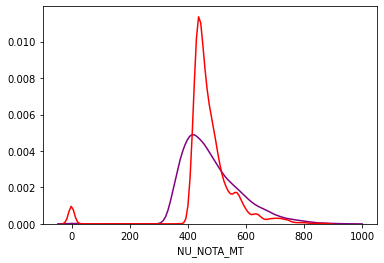

In [57]:
sns.distplot(enem_train['NU_NOTA_MT'], hist=False, color='purple')
sns.distplot(answer['NU_NOTA_MT'], hist=False, color='red')

In [58]:
answer['NU_NOTA_MT'] = answer['NU_NOTA_MT'].apply(lambda x: 0 if x < 250 else x)

In [59]:
answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.742146
std        99.607360
min         0.000000
25%       435.620571
50%       458.755940
75%       501.072670
max       867.125930
Name: NU_NOTA_MT, dtype: float64

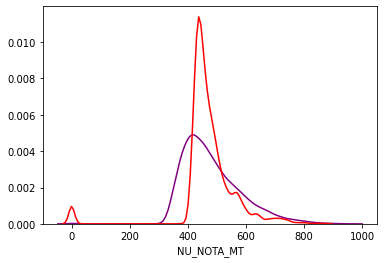

In [60]:
sns.distplot(enem_train['NU_NOTA_MT'], hist=False, color='purple')
sns.distplot(answer['NU_NOTA_MT'], hist=False, color='red')

In [61]:
answer.drop('TP_PRESENCA_CN', axis=1, inplace=True)

In [62]:
answer.to_csv('answer.csv', index=False)

In [63]:
codenation_rf = 93.7545

## Notas

In [64]:
notas = pd.DataFrame({'BaseLine': [mae_bl, rmse_bl, codenation_bl],
                      'RandomForest': [mae_rf, rmse_rf, codenation_rf]
                     },
                    index=['MAE','RMSE','Codenation'])
notas = notas.T

(notas.style.format("{:.4}")
    .highlight_min('RMSE', color='lightgreen')
    .highlight_min('MAE', color='lightgreen')
    .highlight_max('Codenation', color='lightgreen'))

,MAE,RMSE,Codenation
BaseLine,42.7,63.37,93.65
RandomForest,41.71,61.98,93.75
